# Exercises - Evaluation

In [4]:
# prepare environment
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

1. **Load the** 
`tips` 
**dataset from either** 
`pydataset` 
**or** 
`seaborn`
**.**

In [7]:
from pydataset import data
tips = data('tips')

In [11]:
print(tips.describe())
print()
print(tips.info())
print()
tips.head(5)

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB
None



,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2. **Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.** 

    You may follow these steps to do that:
    - import the method from statsmodels: `from statsmodels.formula.api import ols`
    - fit the model to your data, where x = total_bill and y = tip: `regr = ols('y ~ x', data=df).fit()`
    - compute yhat, the predictions of tip using total_bill: `df['yhat'] = regr.predict(df.x)`

In [12]:
from statsmodels.formula.api import ols

In [18]:
df = tips[['total_bill','tip']].rename(columns={'total_bill': 'x', 'tip': 'y'})
df.head(5)

,x,y
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61


In [20]:
regr = ols('y ~ x', data=df).fit()

In [21]:
df['yhat'] = regr.predict(df.x)

In [22]:
df.head(10)

,x,y,yhat
1,16.99,1.01,2.704636
2,10.34,1.66,2.006223
3,21.01,3.50,3.126835
4,23.68,3.31,3.407250
5,24.59,3.61,3.502822
6,25.29,4.71,3.576340
7,8.77,2.00,1.841335
8,26.88,3.12,3.743329
9,15.04,1.96,2.499838
10,14.78,3.23,2.472532


3. **Create a file** 
`evaluate.py`
**that contains the following functions.**

In [ ]:
import evaluate

4. **Write a function,** 
`plot_residuals(x, y, dataframe)` 
**that takes the feature, the target, and the dataframe as input and returns a residual plot.** 
    *(hint: seaborn has an easy way to do this!)*

In [33]:
def plot_residuals(x, y, dataframe):
    return sns.residplot(x=x, y=y, data=dataframe)

[]

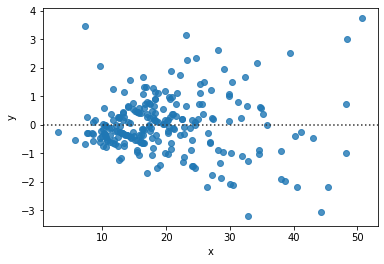

In [34]:
plot_residuals(x=df.x, y=df.y, dataframe=df)
plt.plot()

In [36]:
# compute residuals
df['residual'] = df['yhat'] - df['y']

In [37]:
df.head(10)

,x,y,yhat,residual
1,16.99,1.01,2.704636,1.694636
2,10.34,1.66,2.006223,0.346223
3,21.01,3.50,3.126835,-0.373165
4,23.68,3.31,3.407250,0.097250
5,24.59,3.61,3.502822,-0.107178
6,25.29,4.71,3.576340,-1.133660
7,8.77,2.00,1.841335,-0.158665
8,26.88,3.12,3.743329,0.623329
9,15.04,1.96,2.499838,0.539838
10,14.78,3.23,2.472532,-0.757468


5. **Write a function,** 
`regression_errors(y, yhat)`
**, that takes in y and yhat, returns the sum of squared errors (SSE), explained sum of squares (ESS), total sum of squares (TSS), mean squared error (MSE) and root mean squared error (RMSE).**

In [39]:
def regression_errors(y, yhat):
    '''
    returns SSE, ESS, TSS, MSE, RMSE
    '''
    ESS = sum((yhat - y.mean())**2)
    MSE = mean_squared_error(y, yhat)
    SSE = MSE*len(y)
    TSS = ESS + SSE
    RMSE = sqrt(MSE)
    
    return SSE, ESS, TSS, MSE, RMSE

In [46]:
sse, ess, tss, mse, rmse = regression_errors(df.y, df.yhat)
print(f'SSE: {sse:.4f} (Sum of Squared Errors)')
print(f'ESS: {ess:.4f} (Explained Sum of Squares)')
print(f'TSS: {tss:.4f} (Total Sum of Squares)')
print(f'MSE: {mse:.4f} (Mean Squared Error)')
print(f'RMSE: {rmse:.4f} (Root Mean Squared Error)')

SSE: 252.7887 (Sum of Squared Errors)
ESS: 212.4237 (Explained Sum of Squares)
TSS: 465.2125 (Total Sum of Squares)
MSE: 1.0360 (Mean Squared Error)
RMSE: 1.0179 (Root Mean Squared Error)


6. **Write a function,** 
`baseline_mean_errors(y)`
**, that takes in your target, y, computes the SSE, MSE & RMSE when yhat is equal to the mean of all y, and returns the error values (SSE, MSE, and RMSE).**

In [ ]:
def baseline_mean_errors(y)

7. **Write a function,** 
`better_than_baseline(SSE)`
**, that returns true if your model performs better than the baseline, otherwise false.**

8. **Write a function,** 
`model_significance(ols_model)`
**, that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether the correlation between the model and the tip value are statistically significant.**